In [1]:
from roi import equity, external, utilities, macro, metrics, cost, surveys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
bls_api_key = "c8803d0ba66c4592b8b0eff68ac9ebb0"

In [3]:
data = pd.read_csv("testing/testing-data/test_microdata.csv")

In [4]:
programs = pd.read_csv("testing/testing-data/programs.csv")

In [5]:
data.columns

Index(['Unnamed: 0', 'race', 'gender', 'earnings_start', 'earnings_end', 'age',
       'program', 'program_start', 'program_end', 'education_level',
       'completer', 'employed_at_end', 'employed_at_start', 'state',
       'full_address', 'Address', 'City', 'State', 'Zip', 'id', 'start_month',
       'end_month'],
      dtype='object')

__Equity analysis__

In [6]:
gini = equity.Gini.from_dataframe(data, 'gender', 'earnings_end', sample = 2000)
gini.calculate()

/Users/mattlerner/roi/sbir-roi/roi/equity.py:77: UserWarning: When sample == True, Metric() will use the value of sample to create a random subset of values that it will use for all calculations. This number will be stored as attribute .samplesize.
  warnings.warn("When sample == True, Metric() will use the value of sample to create a random subset of values that it will use for all calculations. This number will be stored as attribute .samplesize.")
/Users/mattlerner/roi/sbir-roi/roi/equity.py:61: UserWarning: Data passed contains 103 NA values. All equity metrics are calculated by ignoring NA values, in effect dropping them. Please ensure that you have a strategy for dealing with these missing values. If values are not missing at random, e.g. if individuals with missing values have common traits, then ALL METRICS calculated will be biased.
  warnings.warn("Data passed contains {} NA values. All equity metrics are calculated by ignoring NA values, in effect dropping them. Please ensur

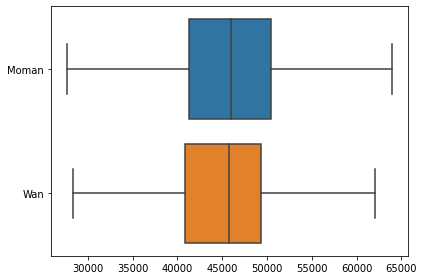

In [7]:
gini.viz

In [8]:
gini.ratio

0.04060089539900541

In [9]:
gini.sample

2000

__Geocode addresses__

In [10]:
small_data = data.sample(30)

In [11]:
small_data.head()

,Unnamed: 0,race,gender,earnings_start,earnings_end,age,program,program_start,program_end,education_level,...,employed_at_start,state,full_address,Address,City,State,Zip,id,start_month,end_month
8572,8573,Earthling,Moman,35196.000,46924.000,38,Anthropology,2014,2015,124,...,1,8,2460 W 26TH AVE STE 217C DENVER CO 80211,2460 W 26TH AVE STE 217C,DENVER,CO,80211,6750,8,7
862,863,Martian,Wan,31245.000,37644.000,42,Philosophy,2013,2015,0,...,1,8,"143 ESSEX STREET, SUITE 721 HAVERHILL MA 1832","143 ESSEX STREET, SUITE 721",HAVERHILL,MA,1832,1685,8,7
1808,1809,Neptunian,Wan,38683.000,43135.000,18,Biology,2012,2013,60,...,1,8,"14621 TITUS STREET, STE 203 PANORAMA CITY CA 9...","14621 TITUS STREET, STE 203",PANORAMA CITY,CA,91402,4464,9,5
2340,2341,Venusian,Wan,27083.000,38510.000,18,Art History,2014,2017,73,...,1,8,1815 NORTH D STREET SAN BERNARDINO CA 92405,1815 NORTH D STREET,SAN BERNARDINO,CA,92405,1694,10,7
3616,3617,Martian,Moman,36490.000,43107.000,45,Art History,2018,2022,81,...,1,8,8247 DEVEREUX DR STE 103 MELBOURNE FL 32940,8247 DEVEREUX DR STE 103,MELBOURNE,FL,32940,339,10,5


In [12]:
small_data['geocode'] = external.Census.get_batch_geocode(small_data)

Successfully geocoded 76.67% of 30 passed addresses.
Of successfully matched addresses, 78.26% were exact matches


__Get SES for each individual with a geocode__

In [13]:
adi = equity.ADI()

In [14]:
small_data['ses'] = adi.get_quintile_for_geocodes_frame(small_data, 'geocode')

Geocode merge: Merged 23 of 30 observations in input dataframe (76.67%)


In [15]:
small_data.head()

,Unnamed: 0,race,gender,earnings_start,earnings_end,age,program,program_start,program_end,education_level,...,full_address,Address,City,State,Zip,id,start_month,end_month,geocode,ses
8572,8573,Earthling,Moman,35196.000,46924.000,38,Anthropology,2014,2015,124,...,2460 W 26TH AVE STE 217C DENVER CO 80211,2460 W 26TH AVE STE 217C,DENVER,CO,80211,6750,8,7,080310006001,20-40
862,863,Martian,Wan,31245.000,37644.000,42,Philosophy,2013,2015,0,...,"143 ESSEX STREET, SUITE 721 HAVERHILL MA 1832","143 ESSEX STREET, SUITE 721",HAVERHILL,MA,1832,1685,8,7,250092601003,60-80
1808,1809,Neptunian,Wan,38683.000,43135.000,18,Biology,2012,2013,60,...,"14621 TITUS STREET, STE 203 PANORAMA CITY CA 9...","14621 TITUS STREET, STE 203",PANORAMA CITY,CA,91402,4464,9,5,060371200202,20-40
2340,2341,Venusian,Wan,27083.000,38510.000,18,Art History,2014,2017,73,...,1815 NORTH D STREET SAN BERNARDINO CA 92405,1815 NORTH D STREET,SAN BERNARDINO,CA,92405,1694,10,7,060710054001,60-80
3616,3617,Martian,Moman,36490.000,43107.000,45,Art History,2018,2022,81,...,8247 DEVEREUX DR STE 103 MELBOURNE FL 32940,8247 DEVEREUX DR STE 103,MELBOURNE,FL,32940,339,10,5,120090631061,40-60


__Check out SES equity concerns__

In [16]:
theil_t = equity.Theil_T.from_dataframe(small_data, 'ses', 'earnings_end')

/Users/mattlerner/roi/sbir-roi/roi/equity.py:61: UserWarning: Data passed contains 1 NA values. All equity metrics are calculated by ignoring NA values, in effect dropping them. Please ensure that you have a strategy for dealing with these missing values. If values are not missing at random, e.g. if individuals with missing values have common traits, then ALL METRICS calculated will be biased.
  warnings.warn("Data passed contains {} NA values. All equity metrics are calculated by ignoring NA values, in effect dropping them. Please ensure that you have a strategy for dealing with these missing values. If values are not missing at random, e.g. if individuals with missing values have common traits, then ALL METRICS calculated will be biased.".format(self.nans))


In [17]:
theil_t.calculate()

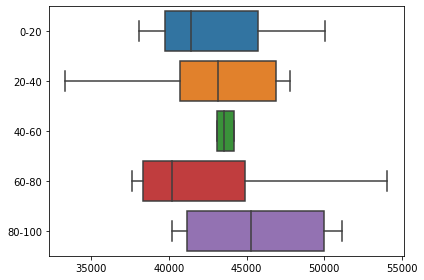

In [18]:
theil_t.viz

In [19]:
theil_t.ratio

0.004347235750113769

__Calculate graduate wage summary statistics__

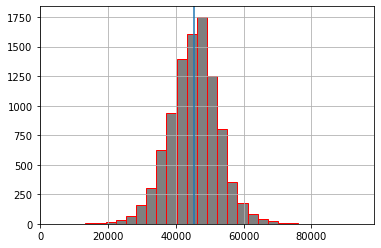

In [20]:
fig, ax = plt.subplots()
data['earnings_end'].hist(ax=ax, edgecolor="red", fc=(0, 0, 0, 0.5), bins=30)
plt.axvline(x=np.mean(data['earnings_end']))

In [21]:
utilities.multiple_describe(data, 'program', 'earnings_end')

,program,n,mean,median,sd,min,max
0,Anthropology,1494.000,44639.437,44741.500,6753.785,6862.000,67561.000
1,Art History,1444.000,45643.767,46205.000,6569.827,17333.000,94136.000
2,Biology,1358.000,44965.921,45574.000,7305.916,19947.000,73508.000
3,Economics,1451.000,46064.692,46641.000,7555.190,13759.000,75326.000
4,Electrical Engineering,1495.000,45717.226,45878.000,7653.728,10667.000,70035.000
5,French Literature,1387.000,44657.446,44871.000,7048.111,4272.000,80934.000
6,Philosophy,1549.000,45563.126,45553.000,8306.679,9972.000,85146.000


__Adjust wages for inflation__

In [22]:
bls = macro.BLS_Ops()
data['earnings_end_adjusted'] = bls.adjust_to_current_dollars(data, 'program_end', 'earnings_end')

Latest CPI year in provided BLS data is 2018.0: All dollars being adjusted to 2018.0 dollars.
Years in provided dataframe for which there is no data in the provided CPI frame:

{2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026}


/Users/mattlerner/roi/sbir-roi/roi/macro.py:58: UserWarning: Value column earnings_end contains 509 NA values (5.0%) of total.
  warnings.warn("Value column {} contains {} NA values ({}%) of total.".format(value_column_name, value_nas, round(100*value_nas/len(frame_),2)))
/Users/mattlerner/roi/sbir-roi/roi/macro.py:71: UserWarning: 2047 rows in column program_end could not be merged with provided CPI data. Please note that (1) the BLS API provides only up to 20 years of data; if you want to use more, you will have to manually combine multiple queries. (2) We do not recommend using more than ten years of historical data in calculations.
  warnings.warn("{} rows in column {} could not be merged with provided CPI data. Please note that (1) the BLS API provides only up to 20 years of data; if you want to use more, you will have to manually combine multiple queries. (2) We do not recommend using more than ten years of historical data in calculations.".format(unmerged_len, year_column_name))

In [23]:
data[['program_end','earnings_end','earnings_end_adjusted']].sample(10)

,program_end,earnings_end,earnings_end_adjusted
644,2013,42076.000,45354.213
2706,2015,39026.000,41347.728
9064,2014,51293.000,54410.346
1442,2015,46319.000,49074.602
3995,2014,42438.000,45017.181
5695,2019,45884.000,nan
9916,2014,53484.000,56734.504
1953,2017,56788.000,58173.424
4462,2020,45300.000,nan
1532,2014,46142.000,48946.292


__Recalculate average graduate wage by program__

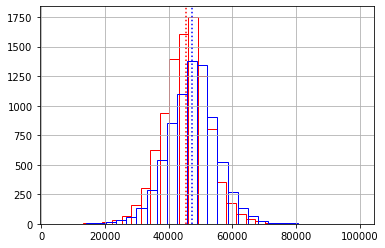

In [24]:
fig, ax = plt.subplots()

# unadjusted
data['earnings_end'].hist(ax=ax, edgecolor="red", fc=(0, 0, 0, 0), bins=30)
plt.axvline(x=np.mean(data['earnings_end']), color="red", linestyle=":")

# adjusted
data['earnings_end_adjusted'].hist(ax=ax, edgecolor="blue", fc=(0, 0, 0, 0), bins=30)
plt.axvline(x=np.mean(data['earnings_end_adjusted']), color="blue", linestyle=":")

__Calculate earnings premium - Simple way__

In [25]:
data['earnings_change'] = data['earnings_end'] - data['earnings_start']

In [26]:
utilities.multiple_describe(data, 'program', 'earnings_change')

,program,n,mean,median,sd,min,max
0,Anthropology,1494.000,9620.091,9776.000,7012.515,-24859.000,40803.000
1,Art History,1444.000,10332.517,9971.000,7061.107,-24181.000,78852.000
2,Biology,1358.000,9937.525,9719.000,7014.123,-23028.000,43846.000
3,Economics,1451.000,10610.721,10666.500,7182.989,-32282.000,56690.000
4,Electrical Engineering,1495.000,10172.111,10131.500,7097.846,-28112.000,50351.000
5,French Literature,1387.000,9900.158,9994.500,7217.218,-30161.000,49783.000
6,Philosophy,1549.000,10381.342,10150.000,8099.393,-30166.000,52950.000


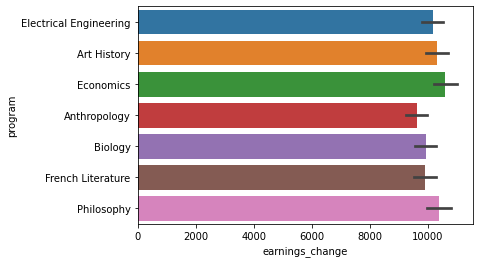

In [27]:
sns.barplot(x="earnings_change", y="program", data=data, estimator=np.mean)

__Calculate earnings premium - Fancy way__

In [29]:
data['year_month_entry'] = data['program_start'].astype(str) + '-' + data['start_month'].astype(str).str.zfill(2)
data['year_month_exit'] = data['program_end'].astype(str) + '-' + data['end_month'].astype(str).str.zfill(2)

In [30]:
data

,Unnamed: 0,race,gender,earnings_start,earnings_end,age,program,program_start,program_end,education_level,...,City,State,Zip,id,start_month,end_month,earnings_end_adjusted,earnings_change,year_month_entry,year_month_exit
0,1,Martian,Wan,26340.000,37403.000,18,Electrical Engineering,2014,2016,0,...,HAMILTON,NJ,8691,9630,10,5,39134.876,11063.000,2014-10,2016-05
1,2,Martian,Wan,27562.000,37011.000,43,Electrical Engineering,2015,2017,0,...,PLYMOUTH,MA,2360,4927,9,6,37913.936,9449.000,2015-09,2017-06
2,3,Martian,Wan,26641.000,36806.000,57,Electrical Engineering,2013,2013,0,...,GALAX,VA,24333,3063,9,5,39673.618,10165.000,2013-09,2013-05
3,4,Martian,Wan,25812.000,37242.000,33,Electrical Engineering,2010,2011,0,...,BROOKLYN,NY,11204,9203,9,6,41576.535,11430.000,2010-09,2011-06
4,5,Martian,Wan,25581.000,37408.000,47,Electrical Engineering,2011,2012,0,...,BOULDER,CO,80301,1136,10,5,40913.638,11827.000,2011-10,2012-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10173,10174,Neptunian,Moman,26840.000,32819.000,20,Philosophy,2015,2019,125,...,REFORM,AL,35481,4515,9,5,nan,5979.000,2015-09,2019-05
10174,10175,Neptunian,Moman,16577.000,69527.000,47,Philosophy,2015,2019,125,...,HOUSTON,TX,77004,1306,9,6,nan,52950.000,2015-09,2019-06
10175,10176,Neptunian,Moman,nan,28739.000,60,Philosophy,2018,2020,125,...,LEWISVILLE,TX,75067,6718,8,7,nan,nan,2018-08,2020-07
10176,10177,Neptunian,Moman,nan,39994.000,55,Philosophy,2016,2018,125,...,VIRGINIA BEACH,VA,23462,5574,9,6,39994.000,nan,2016-09,2018-06


In [31]:
data['macro_wage_change'] = bls.wage_change(data, 'State','year_month_entry','year_month_exit')

/Users/mattlerner/roi/sbir-roi/roi/macro.py:202: UserWarning: Series passed as argument state_code contains invalid values for state codes. Please refer to https://www.bls.gov/respondents/mwr/electronic-data-interchange/appendix-d-usps-state-abbreviations-and-fips-codes.htm for valid codes. Use utilities.State_To_FIPS_series() to convert postal codes to FIPS.
  warnings.warn("Series passed as argument state_code contains invalid values for state codes. Please refer to https://www.bls.gov/respondents/mwr/electronic-data-interchange/appendix-d-usps-state-abbreviations-and-fips-codes.htm for valid codes. Use utilities.State_To_FIPS_series() to convert postal codes to FIPS.")


In [32]:
data['State']

0        NJ
1        MA
2        VA
3        NY
4        CO
         ..
10173    AL
10174    TX
10175    TX
10176    VA
10177    OH
Name: State, Length: 10178, dtype: object

In [33]:
data['state_fips'] = utilities.State_To_FIPS_series(data['State'])

In [34]:
data[['State','state_fips']]

,State,state_fips
0,NJ,34
1,MA,25
2,VA,51
3,NY,36
4,CO,08
...,...,...
10173,AL,01
10174,TX,48
10175,TX,48
10176,VA,51


In [35]:
data['macro_wage_change'] = bls.wage_change(data, 'state_fips','year_month_entry','year_month_exit')

/Users/mattlerner/roi/sbir-roi/roi/macro.py:202: UserWarning: Series passed as argument state_code contains invalid values for state codes. Please refer to https://www.bls.gov/respondents/mwr/electronic-data-interchange/appendix-d-usps-state-abbreviations-and-fips-codes.htm for valid codes. Use utilities.State_To_FIPS_series() to convert postal codes to FIPS.
  warnings.warn("Series passed as argument state_code contains invalid values for state codes. Please refer to https://www.bls.gov/respondents/mwr/electronic-data-interchange/appendix-d-usps-state-abbreviations-and-fips-codes.htm for valid codes. Use utilities.State_To_FIPS_series() to convert postal codes to FIPS.")


In [36]:
data.sample(10)

,Unnamed: 0,race,gender,earnings_start,earnings_end,age,program,program_start,program_end,education_level,...,Zip,id,start_month,end_month,earnings_end_adjusted,earnings_change,year_month_entry,year_month_exit,macro_wage_change,state_fips
2484,2485,Neptunian,Moman,39106.000,45141.000,18,Art History,2012,2015,73,...,78723,945,10,5,47826.520,6035.000,2012-10,2015-05,3219.320,48
9793,9794,Neptunian,Wan,35367.000,48366.000,46,Biology,2012,2013,125,...,60625,9828,8,5,52134.277,12999.000,2012-08,2013-05,513.760,17
6446,6447,Venusian,Moman,38405.000,53161.000,53,Biology,2017,2019,111,...,91606,5716,10,6,nan,14756.000,2017-10,2019-06,3157.440,06
5736,5737,Venusian,Wan,41068.000,nan,26,Electrical Engineering,2010,2013,111,...,60068,8304,10,5,nan,nan,2010-10,2013-05,2433.600,17
9356,9357,Neptunian,Moman,23892.000,29247.000,24,Art History,2015,2016,125,...,60148,8216,10,7,30601.228,5355.000,2015-10,2016-07,-63.440,17
5812,5813,Martian,Moman,28207.000,38251.000,41,Electrical Engineering,2015,2016,111,...,91040,706,8,5,40022.141,10044.000,2015-08,2016-05,1088.880,06
2265,2266,Venusian,Moman,39363.000,46624.000,41,Electrical Engineering,2015,2017,73,...,48025,4303,9,6,47761.459,7261.000,2015-09,2017-06,394.680,26
429,430,Martian,Wan,26237.000,45547.000,44,Anthropology,2012,2015,0,...,62450,4018,8,6,48256.674,19310.000,2012-08,2015-06,2493.400,17
7536,7537,Venusian,Wan,29016.000,42432.000,36,Biology,2016,2020,123,...,90638,5354,9,7,nan,13416.000,2016-09,2020-07,nan,06
344,345,Neptunian,Wan,39179.000,53397.000,26,Economics,2013,2016,0,...,34205,5668,8,6,55869.448,14218.000,2013-08,2016-06,1864.720,12


In [37]:
data['trend_adjusted_change'] = data['earnings_change'] - data['macro_wage_change']

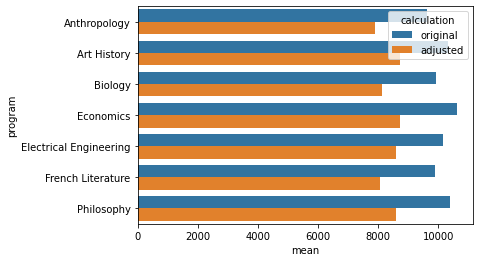

In [38]:
# ignore this ugly cod
original_summary = utilities.multiple_describe(data, 'program', 'earnings_change')
adjusted_summary = utilities.multiple_describe(data, 'program', 'trend_adjusted_change')
original_summary['calculation'] = "original"
adjusted_summary['calculation'] = "adjusted"

sns.barplot(x="mean", y="program", hue="calculation", data=pd.concat([original_summary, adjusted_summary]))

__Calculate earnings premium - VERY fancy way__

In [39]:
premium = metrics.Earnings_Premium(data, 'state_fips', 'education_level', 'earnings_start', 'earnings_end', 'program_start', 'program_end', 'age')

/Users/mattlerner/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [40]:
data['predicted_wage'] = premium.predicted_wage
data['earnings_premium'] = premium.full_premium

In [41]:
data.sample(5)

,Unnamed: 0,race,gender,earnings_start,earnings_end,age,program,program_start,program_end,education_level,...,end_month,earnings_end_adjusted,earnings_change,year_month_entry,year_month_exit,macro_wage_change,state_fips,trend_adjusted_change,predicted_wage,earnings_premium
7565,7566,Earthling,Wan,26780.000,34649.000,31,Biology,2013,2015,123,...,5,36710.332,7869.000,2013-08,2015-05,1043.640,37,6825.360,29976.902,4672.098
4006,4007,Martian,Wan,34158.000,45251.000,33,Biology,2010,2016,81,...,7,47346.263,11093.000,2010-10,2016-07,2844.920,47,8248.080,48167.249,-2916.249
4612,4613,Neptunian,Wan,35872.000,54105.000,18,Electrical Engineering,2017,2019,92,...,5,nan,18233.000,2017-08,2019-05,3290.560,06,14942.440,44652.357,9452.643
3917,3918,Venusian,Moman,30551.000,37462.000,20,Anthropology,2015,2018,81,...,6,37462.000,6911.000,2015-08,2018-06,4001.920,27,2909.080,41020.858,-3558.858
5170,5171,Venusian,Moman,41132.000,50184.000,35,Anthropology,2013,2014,92,...,5,53233.946,9052.000,2013-09,2014-05,123.760,42,8928.240,43294.285,6889.715


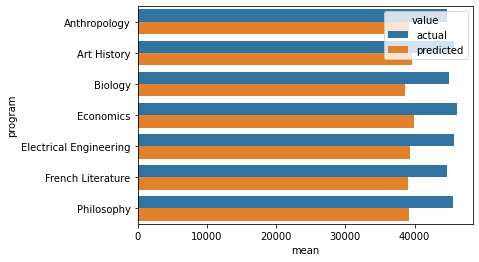

In [42]:
# Mean predicted vs actual wage by program
original_summary = utilities.multiple_describe(data, 'program', 'earnings_end')
adjusted_summary = utilities.multiple_describe(data, 'program', 'predicted_wage')
original_summary['value'] = "actual"
adjusted_summary['value'] = "predicted"

sns.barplot(x="mean", y="program", hue="value", data=pd.concat([original_summary, adjusted_summary]))

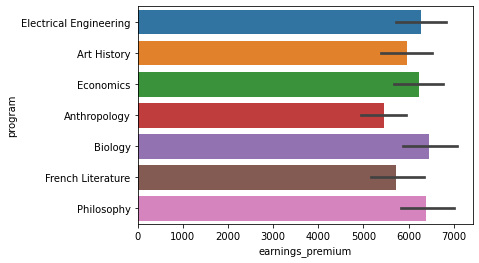

In [43]:
sns.barplot(x="earnings_premium", y="program", data=data, estimator=np.mean)

__Calculate employment premium__

In [44]:
data

,Unnamed: 0,race,gender,earnings_start,earnings_end,age,program,program_start,program_end,education_level,...,end_month,earnings_end_adjusted,earnings_change,year_month_entry,year_month_exit,macro_wage_change,state_fips,trend_adjusted_change,predicted_wage,earnings_premium
0,1,Martian,Wan,26340.000,37403.000,18,Electrical Engineering,2014,2016,0,...,5,39134.876,11063.000,2014-10,2016-05,2525.120,34,8537.880,33129.647,4273.353
1,2,Martian,Wan,27562.000,37011.000,43,Electrical Engineering,2015,2017,0,...,6,37913.936,9449.000,2015-09,2017-06,1596.400,25,7852.600,29168.798,7842.202
2,3,Martian,Wan,26641.000,36806.000,57,Electrical Engineering,2013,2013,0,...,5,39673.618,10165.000,2013-09,2013-05,-1340.040,51,11505.040,26641.000,10165.000
3,4,Martian,Wan,25812.000,37242.000,33,Electrical Engineering,2010,2011,0,...,6,41576.535,11430.000,2010-09,2011-06,572.000,36,10858.000,27542.655,9699.345
4,5,Martian,Wan,25581.000,37408.000,47,Electrical Engineering,2011,2012,0,...,5,40913.638,11827.000,2011-10,2012-05,-705.120,08,12532.120,25867.413,11540.587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10173,10174,Neptunian,Moman,26840.000,32819.000,20,Philosophy,2015,2019,125,...,5,nan,5979.000,2015-09,2019-05,4041.440,01,1937.560,37922.562,-5103.562
10174,10175,Neptunian,Moman,16577.000,69527.000,47,Philosophy,2015,2019,125,...,6,nan,52950.000,2015-09,2019-06,4783.480,48,48166.520,16279.492,53247.508
10175,10176,Neptunian,Moman,nan,28739.000,60,Philosophy,2018,2020,125,...,7,nan,nan,2018-08,2020-07,nan,48,nan,nan,nan
10176,10177,Neptunian,Moman,nan,39994.000,55,Philosophy,2016,2018,125,...,6,39994.000,nan,2016-09,2018-06,1187.160,51,nan,nan,nan


__Calculate time to completion and completion rate statistics__

In [45]:
completion = metrics.Completion(data, 'program', 'program_start', 'program_end', 'employed_at_end')

In [46]:
completion_time = completion.time_to_completion
completion_time

,program,n,mean,median,sd,min,max
0,Anthropology,1494,2.327,2,1.670,0,8
1,Art History,1444,2.391,2,1.669,0,9
2,Biology,1358,2.323,2,1.666,0,9
3,Economics,1451,2.378,2,1.608,0,8
4,Electrical Engineering,1495,2.282,2,1.662,0,8
5,French Literature,1387,2.373,2,1.647,0,10
6,Philosophy,1549,2.299,2,1.658,0,8


In [47]:
completion_rate = completion.completion_rates
completion_rate

,program,n,mean,median,sd,min,max
0,Anthropology,1494,0.898,1,0.303,0,1
1,Art History,1444,0.925,1,0.263,0,1
2,Biology,1358,0.908,1,0.289,0,1
3,Economics,1451,0.905,1,0.293,0,1
4,Electrical Engineering,1495,0.906,1,0.292,0,1
5,French Literature,1387,0.898,1,0.302,0,1
6,Philosophy,1549,0.912,1,0.283,0,1


Text(0.5, 1.0, 'Average time to complete')

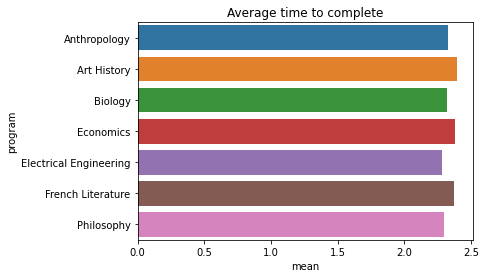

In [48]:
sns.barplot(x="mean", y="program", data=completion_time).set_title("Average time to complete")

Text(0.5, 1.0, 'Average completion rate')

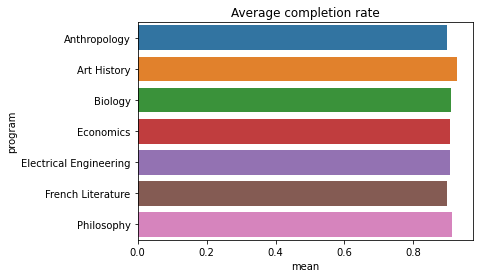

In [49]:
sns.barplot(x="mean", y="program", data=completion_rate).set_title("Average completion rate")

__Try out loan amounts__

In [50]:
data_programs = data.merge(programs, left_on="program", right_on="programs", how="left")
data_programs['total_cost'] = data_programs['cost_per_semester'] * data_programs['length']
data_programs['period_payment'] = cost.Compound_Interest_Loan.calculate_period_payment(data_programs['total_cost'], 0.05, 10)

In [51]:
data_programs.sample(10)

,Unnamed: 0_x,race,gender,earnings_start,earnings_end,age,program,program_start,program_end,education_level,...,predicted_wage,earnings_premium,time_to_completion,Unnamed: 0_y,programs,degree,length,cost_per_semester,total_cost,period_payment
7967,7968,Earthling,Moman,25769.000,44613.000,18,Philosophy,2012,2017,123,...,40912.807,3700.193,5,7,Philosophy,BA,8,8000,64000,8288.293
4094,4095,Venusian,Moman,38797.000,nan,37,Biology,2015,2018,81,...,44199.083,nan,3,5,Biology,AS,3,3000,9000,1165.541
469,470,Neptunian,Wan,36422.000,47862.000,54,Anthropology,2013,2013,0,...,36422.000,11440.000,0,4,Anthropology,BA,4,4500,18000,2331.082
8934,8935,Neptunian,Wan,33465.000,41706.000,33,Philosophy,2009,2010,124,...,35056.191,6649.809,1,7,Philosophy,BA,8,8000,64000,8288.293
5918,5919,Venusian,Wan,35820.000,47783.000,23,Art History,2015,2016,111,...,39185.019,8597.981,1,2,Art History,BA,8,7000,56000,7252.256
7667,7668,Earthling,Moman,36078.000,61210.000,38,Biology,2015,2015,123,...,36078.000,25132.000,0,5,Biology,AS,3,3000,9000,1165.541
5634,5635,Martian,Moman,36567.000,39010.000,30,Philosophy,2015,2017,92,...,42016.310,-3006.310,2,7,Philosophy,BA,8,8000,64000,8288.293
9108,9109,Martian,Moman,33803.000,43086.000,36,Electrical Engineering,2015,2016,125,...,34932.456,8153.544,1,1,Electrical Engineering,BA,8,5000,40000,5180.183
3760,3761,Venusian,Moman,38643.000,47183.000,18,Economics,2010,2015,81,...,63027.114,-15844.114,5,3,Economics,MA,4,10000,40000,5180.183
356,357,Neptunian,Wan,38716.000,45141.000,18,Economics,2017,2018,0,...,43628.673,1512.327,1,3,Economics,MA,4,10000,40000,5180.183


In [52]:
data_programs['premium_with_payments'] = data_programs['earnings_premium'] - data_programs['period_payment']

In [53]:
summary_w_payments = utilities.multiple_describe(data_programs, 'program', 'premium_with_payments')

Text(0.5, 1.0, 'Return including loan payments')

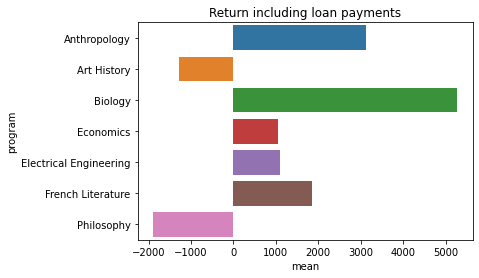

In [54]:
sns.barplot(x="mean", y="program", data=summary_w_payments).set_title("Return including loan payments")

__High school baselines__

In [55]:
cps = surveys.CPS_Ops()

/Users/mattlerner/roi/sbir-roi/roi/utilities.py:135: UserWarning: State codes, though integers, should be passed as strings. Something else was passed. Attempting to coerce to string.
  warnings.warn("State codes, though integers, should be passed as strings. Something else was passed. Attempting to coerce to string.")


In [56]:
cps.rudimentary_hs_baseline('08', [1, 5, 10])

[15017.630256967966, 21688.246894625805, 34336.28062777556]

In [57]:
{'year1': 15017.630256967966,
 'year5': 21688.246894625805,
 'year10': 34336.28062777556}

{'year1': 15017.630256967966,
 'year5': 21688.246894625805,
 'year10': 34336.28062777556}

In [130]:
states = ['CA','TX','AK','MS','CO']
fips = utilities.State_To_FIPS_series(states)

State_To_FIPS_series usually takes a pandas series. Something else was passed. Now trying under assumption that passed object is list or array


In [131]:
fips

['06', '48', '02', '28', '08']

In [132]:
baselines = pd.DataFrame([cps.rudimentary_hs_baseline(state, [1, 5, 10]) for state in fips])
baselines['state'] = states
baselines.columns = ['1','5','10','State']

In [133]:
baselines_melted = pd.melt(baselines, id_vars=['State'], var_name="year", value_name="earnings")
baselines_melted['year'] = baselines_melted['year'].astype(int)
baselines_melted['earnings'] = baselines_melted['earnings'].astype(int)

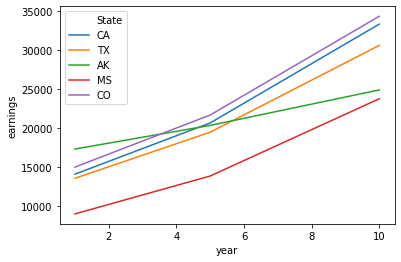

In [134]:
sns.lineplot(data=baselines_melted, x="year", y="earnings", hue="State")